In [7]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv(r"C:\Users\ganac\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Check the column names
print(df.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [11]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [13]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


In [17]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [18]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [20]:
# Convert MonthlyCharges to numeric if not already
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Drop any rows with missing MonthlyCharges or Churn
df = df.dropna(subset=['MonthlyCharges', 'Churn'])

# Ensure Churn is integer (after encoding)
df['Churn'] = df['Churn'].astype(int)


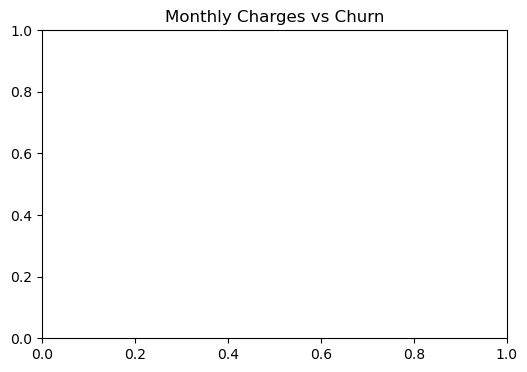

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


C:\Users\ganac\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ganac\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


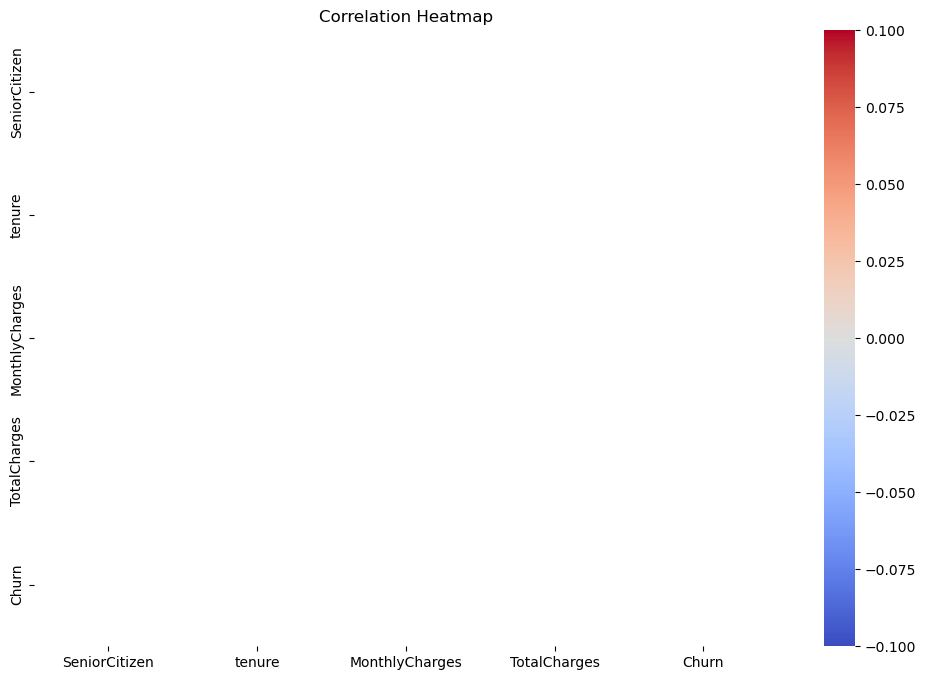

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [23]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [25]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (0, 4)
Shape of y: (0,)


In [28]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [30]:
# Reload original data
df = pd.read_csv(r'C:\Users\ganac\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = df.columns.str.strip()

# Clean and prepare
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Confirm target is present
print('Churn in columns:', 'Churn' in df_encoded.columns)

# Define X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Final shape check
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Churn in columns: True
Shape of X: (7032, 7061)
Shape of y: (7032,)


In [32]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (5625, 7061)
Testing set: (1407, 7061)


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
# Predict on test set
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[947  86]
 [210 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407

Accuracy Score: 0.7896233120113717


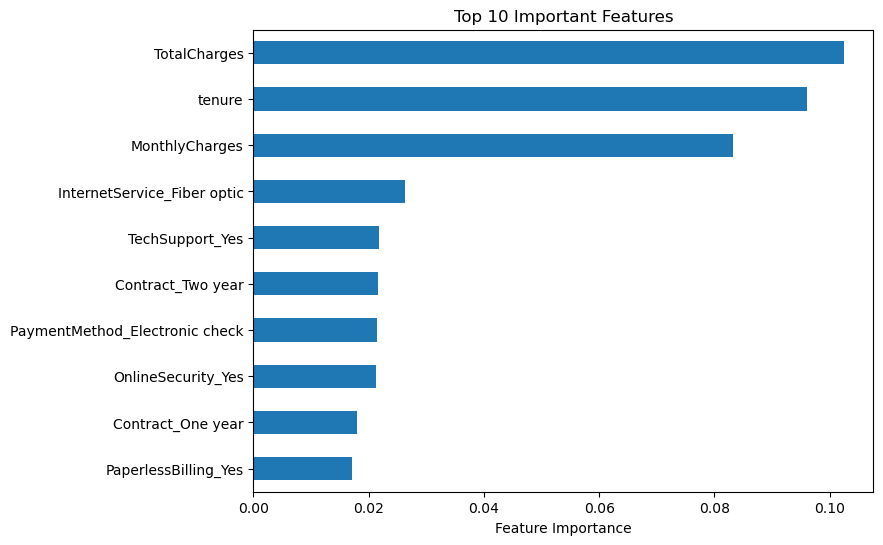

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Create feature importance Series
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot top 10 important features
top_features = feature_importance.nlargest(10)
top_features.sort_values().plot(kind='barh', figsize=(8,6), title='Top 10 Important Features')
plt.xlabel("Feature Importance")
plt.show()


In [39]:
# Save the final dataframe
df.to_csv("cleaned_churn_data.csv", index=False)

In [41]:
import joblib

# Save the model
joblib.dump(model, 'customer_churn_model.pkl')


['customer_churn_model.pkl']